In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyp

In [194]:
data = pd.read_csv('netflix_titles_filled_directors.csv')

In [196]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [198]:
df=data.dropna()

In [200]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [202]:
df['release_year'].nunique()

72

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [206]:
df=df.copy()

In [208]:
df.loc[:,'Year_added']=pd.to_datetime(df['date_added'], errors='coerce')
df.loc[:,'Year_added']= df['Year_added'].dt.year.astype('Int64')

C:\Users\Joy\AppData\Local\Temp\ipykernel_30120\647762416.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
 ...
 2016, 2019, 2018, 2019, 2018, 2016, 2019, 2019, 2020, 2019]
Length: 5332, dtype: Int64' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[:,'Year_added']= df['Year_added'].dt.year.astype('Int64')


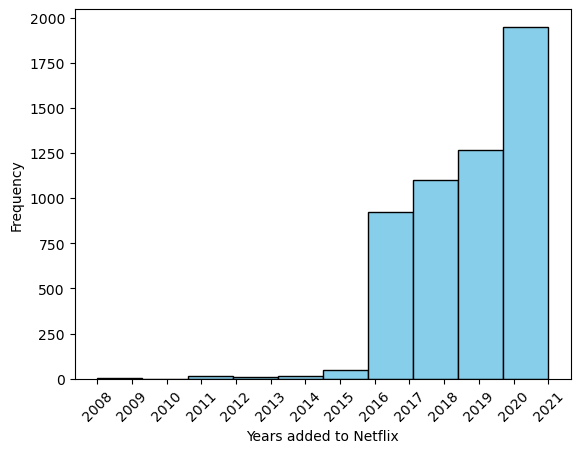

In [274]:
bins= range(df['Year_added'].min(),df['Year_added'].max()+1)
pyp.hist(df['Year_added'], color='skyblue',edgecolor='black')
pyp.xticks(ticks=bins, rotation=45);
pyp.xlabel('Years added to Netflix')
pyp.ylabel('Frequency')
pyp.show()

It can be seen that Netflix took off with adding movies onto its platform from 2016 and up. Its more than 
a 100% increase from 2015-2016. After 2016, movies and tv shows added onto the platform keep on 
increasing steadily. 

<Axes: title={'center': 'Movie vs Tv shows'}, xlabel='type'>

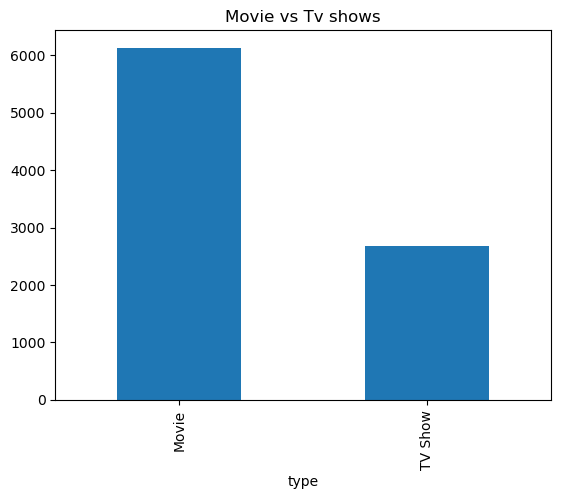

In [213]:
data.value_counts('type').plot(kind='bar', title='Movie vs Tv shows')

Movies are more widely popular to be added onto Netflix compared to TV shows 

<Axes: title={'center': 'Top Countries'}, xlabel='country'>

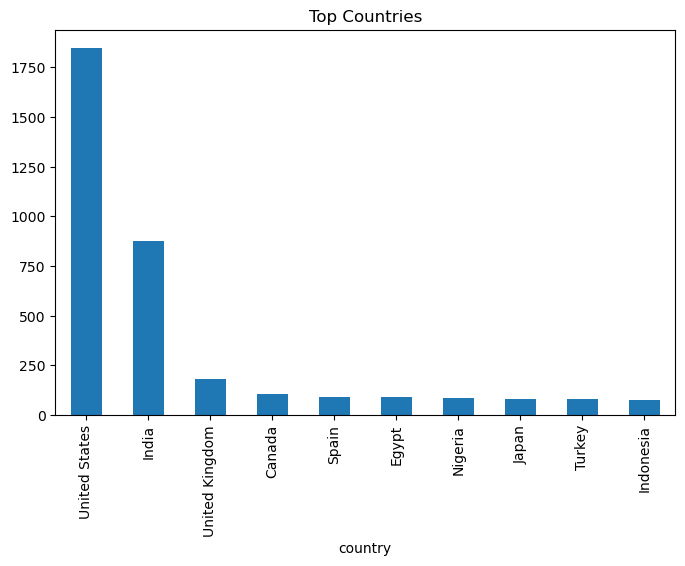

In [216]:
pyp.figure(figsize=(8,5))
df.value_counts('country').dropna().head(10).plot(kind='bar', title='Top Countries')

In [220]:
df['listed_in']=df['listed_in'].str.split(', ')
listed=df.explode('listed_in')

In [224]:
listed['listed_in'].value_counts().head(15)

listed_in
International Movies        2369
Dramas                      2293
Comedies                    1553
Action & Adventure           806
Independent Movies           740
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Horror Movies                336
Stand-Up Comedy              294
Music & Musicals             292
Sci-Fi & Fantasy             236
Sports Movies                156
Classic Movies               108
Name: count, dtype: int64

In [228]:
duration_df=data.copy()
duration_df['duration_int']= duration_df['duration'].str.extract(r'(\d+)').astype('Int64')
# takes numbers of the duration column and change it to a int. Assigning it into a new column called 'duration int'

Text(0.5, 0, 'Movie Duration in Minutes')

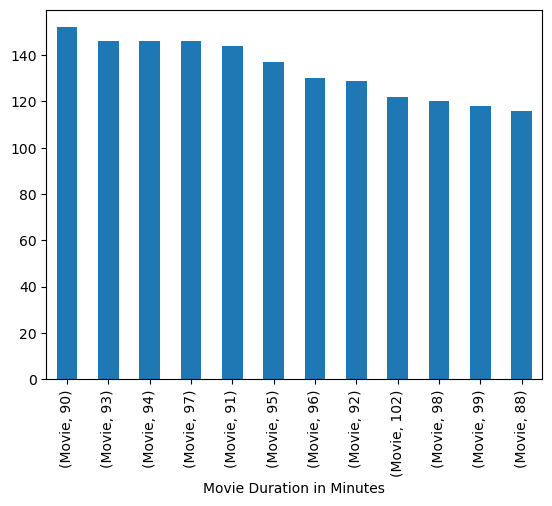

In [231]:
duration_df[duration_df['type']=='Movie'].groupby('type')['duration_int'].value_counts().head(12).plot(kind='bar')
pyp.xlabel('Movie Duration in Minutes')

Text(0.5, 1.0, 'TV Show Durations')

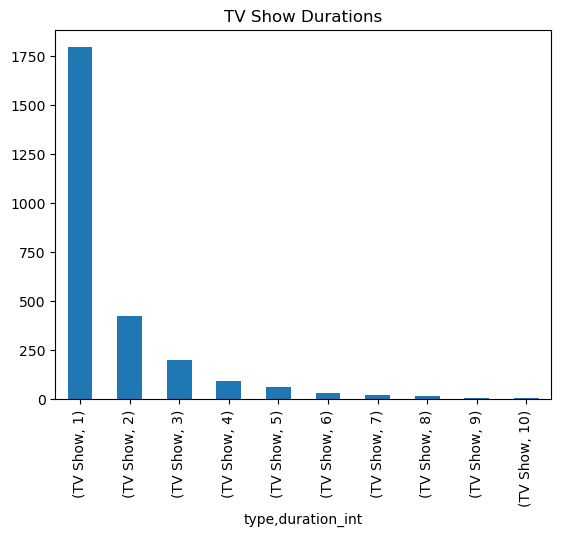

In [233]:
duration_df[duration_df['type']=='TV Show'].groupby('type')['duration_int'].value_counts().head(10).plot(kind='bar')
pyp.title('TV Show Durations')

Many tv shows start off with a season 1 but if the first 
season wasn't that popular then there is likely not going to have another season. 
The graph shows a 73%(estimated) drop from season 1 to season 2 durations. This means 
more than half of tv shows released on netflix are never renewed for a season 2. 

In [277]:
data['rating'].value_counts().head(9)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
Name: count, dtype: int64

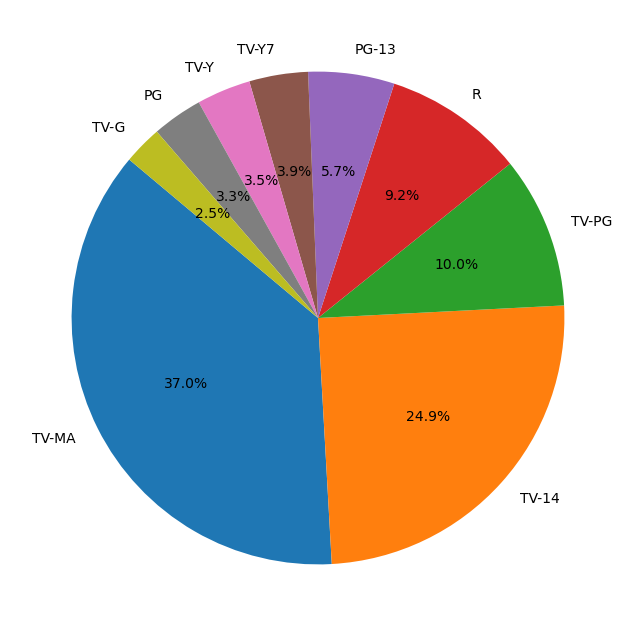

In [285]:
rating =data['rating'].value_counts().head(9)
pyp.figure(figsize=(16,8))
pyp.pie(rating, autopct='%1.1f%%', startangle=140, labels=rating.index);

G- general audience 
, PG- parental guide
, PG-13 - parents strongly caution 
, R- restricted, accompany by parent 
, TV-y and TV-y7: suitable for kids 

About 61% of shows on netflix are rated TV-14 or TV-MA. This means Netflix is more targeted towards older teens to adult population. 
While kids are less target with kids show being less than 8% on the platform. 

In [239]:
exclude = ['International Movies', 'Independent Movies']
filter= listed[~listed['listed_in'].isin(exclude)] 
df_genre= filter[filter['listed_in'].isin(filter['listed_in'].value_counts().nlargest(7).index)]# count the top 7 genres and and put it into a new data frame

In [332]:
df_genre['listed_in'].value_counts()

listed_in
Dramas                      2293
Comedies                    1553
Action & Adventure           806
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Name: count, dtype: int64

C:\Users\Joy\AppData\Local\Temp\ipykernel_30120\1030258198.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_genre, x= 'listed_in', y='release_year', alpha=0.5, palette='set2');


Text(0.5, 1.0, 'Top 7 genres vs release year of the movie')

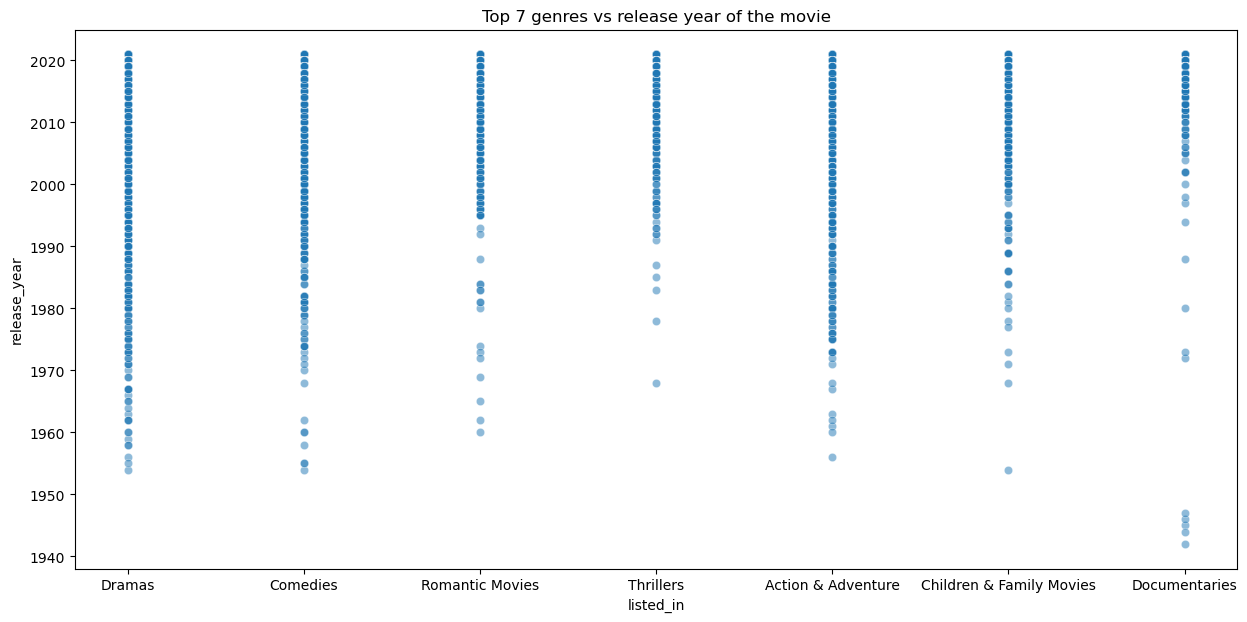

In [242]:
pyp.figure(figsize=(15,7))

sns.scatterplot(data=df_genre, x= 'listed_in', y='release_year', alpha=0.5, palette='set2');
pyp.title('Top 7 genres vs release year of the movie')


C:\Users\Joy\AppData\Local\Temp\ipykernel_30120\850623006.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_genre, x= 'listed_in', y='Year_added', alpha=0.5, palette='set2');


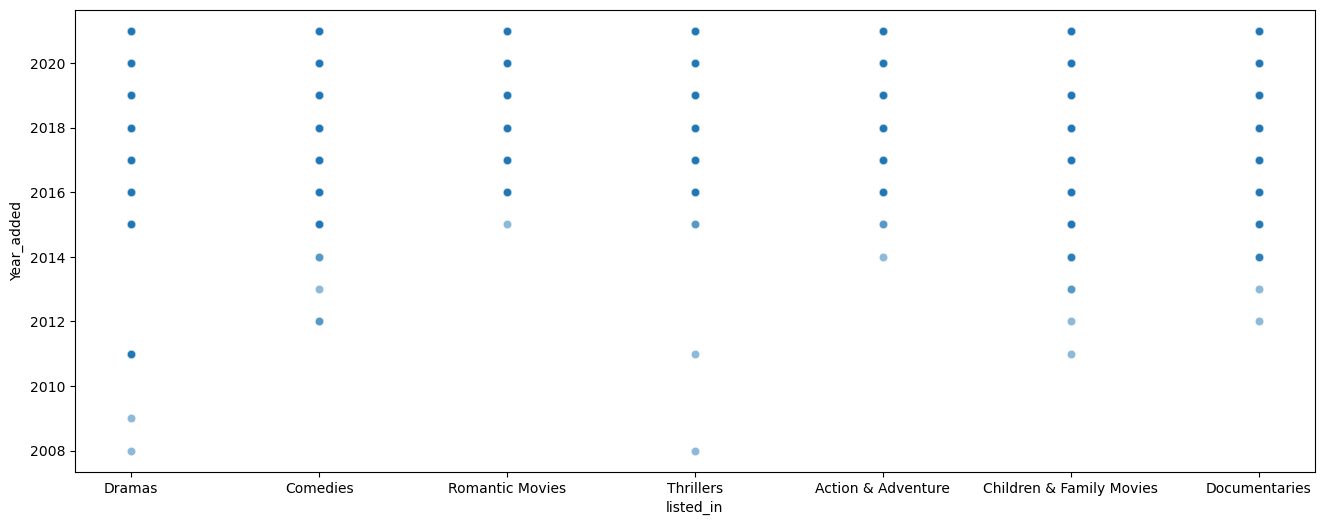

In [244]:
pyp.figure(figsize=(16,6))
sns.scatterplot(data=df_genre, x= 'listed_in', y='Year_added', alpha=0.5, palette='set2');

In [299]:
data['cast']=data['cast'].str.split(', ')

In [301]:
direct_cast= data.explode('cast')

In [309]:
direct_cast['cast'].value_counts().head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

In [311]:
direct_cast['director'].value_counts().head(10)

director
Martin Scorsese        139
Cathy Garcia-Molina    125
Rajiv Chilaka          121
Steven Spielberg       121
Youssef Chahine        104
Quentin Tarantino       94
Robert Rodriguez        92
David Dhawan            90
Don Michael Paul        88
McG                     88
Name: count, dtype: int64

Conclusion: 

Netlfix adds/releases shows and movies more towards teenagers and adults. With there top 3 countries of release in
is US, India, and UK. There are more movies added throughout the years since Netflix started compare to TV shows. The reason for this is 
TV shows have seasons. From the TV show duration histogram it can be seen lots of tv shows are not renew for a second season. We can guess the 
reason for that is the tv shows didn't generate big enought numbers for Netflix to feel they can invest more into the specific tv series which causes
season 1 to season 2 tv shows to have a big drop in the histogram plot.

Dramas, Actions, and Comedy are the top 3 genres that a lot of these movies and tv shows have. Netflix took off with adding more movies and tv shows 
from 2016 and up. 